In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from prophet import Prophet
import seaborn as sns
# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


C:\Users\Falguni\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
df = pd.read_csv(r"D:\flaskproject3\artifacts\raw.csv")

In [22]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16


In [6]:
df.dtypes

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'])


In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        500 non-null    object        
 1   symbol      500 non-null    object        
 2   price       500 non-null    float64       
 3   1h          497 non-null    float64       
 4   24h         497 non-null    float64       
 5   7d          497 non-null    float64       
 6   24h_volume  497 non-null    float64       
 7   mkt_cap     500 non-null    float64       
 8   date        500 non-null    datetime64[ns]
 9   year        500 non-null    int32         
 10  month       500 non-null    int32         
 11  day         500 non-null    int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(2)
memory usage: 41.1+ KB


In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 499
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        497 non-null    object        
 1   symbol      497 non-null    object        
 2   price       497 non-null    float64       
 3   1h          497 non-null    float64       
 4   24h         497 non-null    float64       
 5   7d          497 non-null    float64       
 6   24h_volume  497 non-null    float64       
 7   mkt_cap     497 non-null    float64       
 8   date        497 non-null    datetime64[ns]
 9   year        497 non-null    int32         
 10  month       497 non-null    int32         
 11  day         497 non-null    int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(2)
memory usage: 44.7+ KB


In [12]:
df.shape

(497, 12)

In [61]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            3
24h           3
7d            3
24h_volume    3
mkt_cap       0
date          0
dtype: int64

In [62]:
print(df['date'].nunique())
print(df['date'].value_counts())


1
date
2022-03-16    500
Name: count, dtype: int64


In [63]:
(df == np.inf).sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

In [64]:
df.dropna()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16


In [67]:
df = df[df['price'] > 0] 

In [68]:
print(df.describe())

              price          1h         24h          7d    24h_volume  \
count  5.000000e+02  497.000000  497.000000  497.000000  4.970000e+02   
mean   6.527851e+02    0.018746    0.028849    0.039016  3.276644e+08   
std    4.578529e+03    0.013867    0.058065    0.203688  3.182264e+09   
min    1.544000e-09   -0.039000   -0.141000   -0.547000  0.000000e+00   
25%    1.904625e-01    0.011000    0.004000   -0.020000  1.838591e+06   
50%    1.085000e+00    0.018000    0.021000    0.006000  8.581305e+06   
75%    6.925000e+00    0.026000    0.040000    0.049000  4.075655e+07   
max    4.121727e+04    0.086000    0.573000    2.935000  5.793497e+10   

            mkt_cap  
count  5.000000e+02  
mean   3.722677e+09  
std    3.784349e+10  
min    6.577043e+07  
25%    1.146391e+08  
50%    2.083208e+08  
75%    5.845642e+08  
max    7.709915e+11  


In [76]:
df['moving_average'] = df['price'].rolling(window=5).mean()
df['volatility'] = df['price'].rolling(window=5).std()
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap'] 

In [77]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,moving_average,volatility,liquidity_ratio
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,NaN,NaN,0.045903
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,NaN,NaN,0.060374
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,NaN,NaN,0.724503
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,NaN,NaN,0.021795
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,8797.859975,17959.416594,0.074150
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16,1353.696805,3026.911105,0.221823
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16,0.324805,0.679876,0.109963
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16,0.323422,0.680688,0.006379
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16,0.415047,0.656680,0.247817


In [136]:
Q1 = df['liquidity_ratio'].quantile(0.25)
Q3 = df['liquidity_ratio'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_cleaned = df[(df['liquidity_ratio'] >= (Q1 - 1.5 * IQR)) & (df['liquidity_ratio'] <= (Q3 + 1.5 * IQR))]


In [145]:
df_cleaned

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,moving_average,volatility,liquidity_ratio
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,NaN,NaN,0.045903
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,NaN,NaN,0.060374
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,NaN,NaN,0.021795
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,8797.859975,17959.416594,0.074150
5,XRP,XRP,0.785018,0.019,0.019,0.089,3.925205e+09,3.753079e+10,2022-03-16,626.124978,1195.684426,0.104586
...,...,...,...,...,...,...,...,...,...,...,...,...
492,ThunderCore,TT,0.007870,0.006,-0.003,0.018,1.360123e+07,6.786240e+07,2022-03-16,1367.278719,3019.452076,0.200424
493,OpenDAO,SOS,0.000002,0.030,0.053,-0.090,1.438232e+07,6.755566e+07,2022-03-16,1367.267574,3019.458384,0.212896
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16,0.324805,0.679876,0.109963
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16,0.323422,0.680688,0.006379


In [146]:
df_cleaned.fillna(method='ffill', inplace=True)

C:\Users\Falguni\AppData\Local\Temp\ipykernel_3292\1365703778.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='ffill', inplace=True)
C:\Users\Falguni\AppData\Local\Temp\ipykernel_3292\1365703778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.fillna(method='ffill', inplace=True)


In [156]:
X = df_cleaned[['24h','7d','24h_volume','mkt_cap']]

In [157]:
y = df_cleaned['liquidity_ratio']

In [158]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [159]:
Scaler = MinMaxScaler()

In [160]:
Scaler.fit_transform(X_train)

array([[1.80404355e-01, 3.68541033e-01, 6.69298958e-04, 1.27384404e-04],
       [2.73716952e-01, 4.13373860e-01, 2.64200038e-04, 1.30264116e-04],
       [3.40590980e-01, 4.64285714e-01, 2.59861024e-04, 7.55439100e-05],
       ...,
       [2.31726283e-01, 4.15653495e-01, 2.31351608e-05, 2.74861407e-05],
       [2.98600311e-01, 4.71884498e-01, 6.22276123e-04, 1.77523645e-04],
       [2.70606532e-01, 4.36930091e-01, 8.01053084e-03, 4.03010461e-03]],
      shape=(366, 4))

In [3]:
rf = RandomForestRegressor(random_state=42)
 

In [142]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2', 'sqrt']
}

In [162]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='r2'  # You can change this to 'neg_mean_squared_error' if desired
)

In [163]:
grid_search.fit(X_train, y_train)

# 5. Best model and parameters
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [164]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=200,
                      random_state=42)

In [165]:
y_pred = best_rf.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8003919232368966


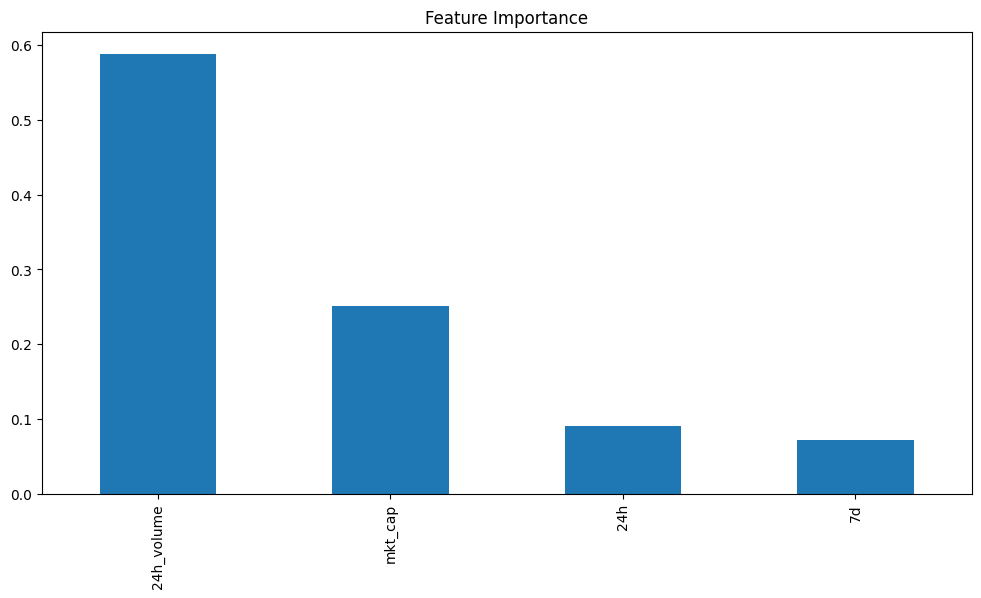

In [166]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Sort and plot
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(12,6), title='Feature Importance')
plt.show()


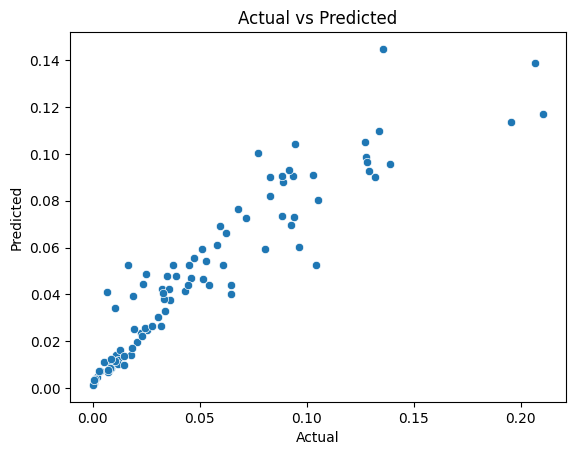

In [167]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Plot residuals

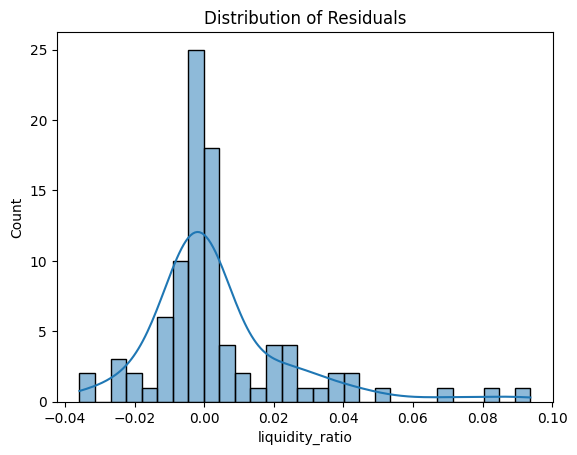

In [168]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()